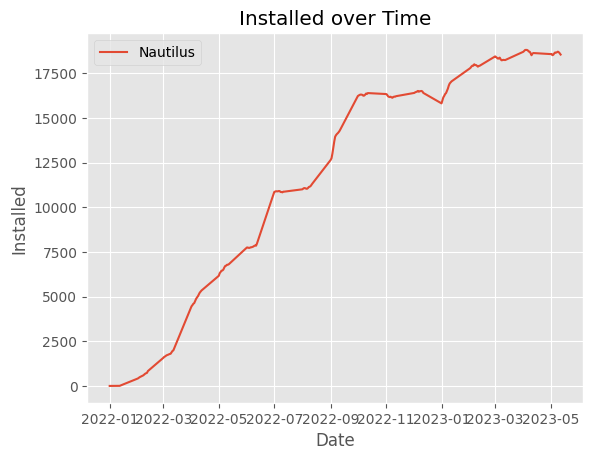

In [21]:
#from matplotlib import dates
from matplotlib.dates import datestr2num
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('combined.csv')

# Convert 'Installed' column to numeric
df['Installed'] = df['Installed'].str.replace(',', '').astype(float)

# Initialize an empty list to store the converted dates
converted_dates = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    date_str = row['Date']
    platform = row['Platform']
    
    if platform == 'Nautilus':
        # Parse the date for Nautilus platform using the format '%m/%d/%Y'
        converted_date = pd.to_datetime(date_str, format='%m/%d/%Y', errors='coerce')
    elif platform == 'Mobile':
        # Parse the date for Mobile platform using the format '%d/%m/%Y'
        converted_date = pd.to_datetime(date_str, format='%d/%m/%Y', errors='coerce')
    else:
        # If platform is neither 'Nautilus' nor 'Mobile', set the converted date as NaT (Not a Time)
        converted_date = pd.NaT
    
    converted_dates.append(converted_date)

# Add the converted dates to the DataFrame
df['Converted_Date'] = converted_dates

# Filter out rows with invalid dates
df_valid_dates = df.dropna(subset=['Converted_Date'])

# Group the data by 'Platform'
grouped_data = df_valid_dates.groupby('Platform')

# Plot each group separately
for platform, data in grouped_data:
    plt.plot(data['Converted_Date'], data['Installed'], label=platform)

# Set the labels and title for the graph
plt.xlabel('Date')
plt.ylabel('Installed')
plt.title('Installed over Time')

# Set the x-axis ticks and labels
#plt.xticks(dates, dates.to_period("Q").astype(str), rotation=45)
# Add a legend
plt.legend()

# Show the graph
plt.show()


In [22]:
import pandas as pd

# Skip the first 3 rows (use 4 if row index starts from 1)
df_ios = pd.read_csv('iOS.csv', skiprows=3)

# Transpose DataFrame to get dates as rows instead of columns
df_ios = df_ios.transpose()

# Reset the DataFrame index
df_ios.reset_index(inplace=True)

# Assign the first row as the column headers
df_ios.columns = df_ios.iloc[0]

# Drop the first row as it's now the column header
df_ios = df_ios[1:]

# Reset the index after dropping the first row
df_ios.reset_index(drop=True, inplace=True)

# View the DataFrame
print(df_ios)


0      Maßeinheit Einheiten
0    Mai 15, 2022         0
1    Mai 16, 2022         0
2    Mai 17, 2022         0
3    Mai 18, 2022         0
4    Mai 19, 2022         0
..            ...       ...
361  Mai 11, 2023        21
362  Mai 12, 2023         7
363  Mai 13, 2023        12
364  Mai 14, 2023         9
365        Gesamt     13733

[366 rows x 2 columns]


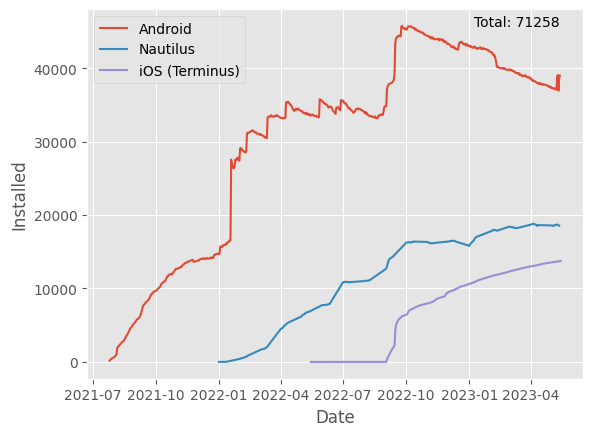

In [23]:
import dateparser
import seaborn as sns

# Set the ggplot style
plt.style.use('ggplot')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('combined.csv')

# Convert 'Installed' column to numeric
df['Installed'] = df['Installed'].str.replace(',', '').astype(float)

# Initialize an empty list to store the converted dates
converted_dates = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    date_str = row['Date']
    platform = row['Platform']

    if platform == 'Nautilus':
        # Parse the date for Nautilus platform using the format '%m/%d/%Y'
        converted_date = pd.to_datetime(date_str, format='%m/%d/%Y', errors='coerce')
    elif platform == 'Android':
        # Parse the date for Mobile platform using the format '%d/%m/%Y'
        converted_date = pd.to_datetime(date_str, format='%d/%m/%Y', errors='coerce')
    else:
        # If platform is neither 'Nautilus' nor 'Mobile', set the converted date as NaT (Not a Time)
        converted_date = pd.NaT

    converted_dates.append(converted_date)

# Add the converted dates to the DataFrame
df['Converted_Date'] = converted_dates

# Filter out rows with invalid dates
df_valid_dates = df.dropna(subset=['Converted_Date'])

# Group the data by 'Platform'
grouped_data = df_valid_dates.groupby('Platform')

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot each group separately using sns.lineplot with customized style
for platform, data in grouped_data:
    sns.lineplot(data=data, x='Converted_Date', y='Installed', label=platform, ax=ax)

# First, replace the German abbreviations with English full month names
df_ios['Maßeinheit'] = df_ios['Maßeinheit'].replace({
    'Jan.': 'January',
    'Feb.': 'February',
    'März': 'March',
    'Apr.': 'April',
    'Mai': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Aug.': 'August',
    'Sept.': 'September',
    'Okt.': 'October',
    'Nov.': 'November',
    'Dez.': 'December'
}, regex=True)

# Group the new data by 'Maßeinheit' and sum the 'Einheiten'
new_grouped_data = df_ios.groupby('Maßeinheit')['Einheiten'].sum().reset_index()

# Convert 'Maßeinheit' to datetime using dateparser.parse
new_grouped_data['Maßeinheit'] = new_grouped_data['Maßeinheit'].apply(dateparser.parse)

# Sort the data by date
new_grouped_data = new_grouped_data.sort_values(by='Maßeinheit')

# Create a cumulative sum of the 'Einheiten' column
new_grouped_data['Cumulative_Einheiten'] = new_grouped_data['Einheiten'].cumsum()

# Plot the new data using sns.lineplot with customized style
sns.lineplot(data=new_grouped_data, x='Maßeinheit', y='Cumulative_Einheiten', label="iOS (Terminus)", ax=ax)

# Calculate and display the grand total
total_installs = df['Installed'].sum()

# Set the labels
# Manually input the total as a string
total_label = "Total: 71258"
ax.text(df_valid_dates['Converted_Date'].max(), df_valid_dates['Installed'].max(), total_label, ha='right')


# Set the labels and title for the graph
ax.set_xlabel('Date')
ax.set_ylabel('Installed')
#ax.set_title('Installed over Time')

# Show the legend
ax.legend()

# Show the graph
plt.show()


/var/folders/wm/c1l5tmrd2gs56650ysjlv1qm0000gn/T/ipykernel_25004/454152798.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_dates['Cumulative_Installed'] = df_valid_dates.groupby('Platform')['Installed'].cumsum()


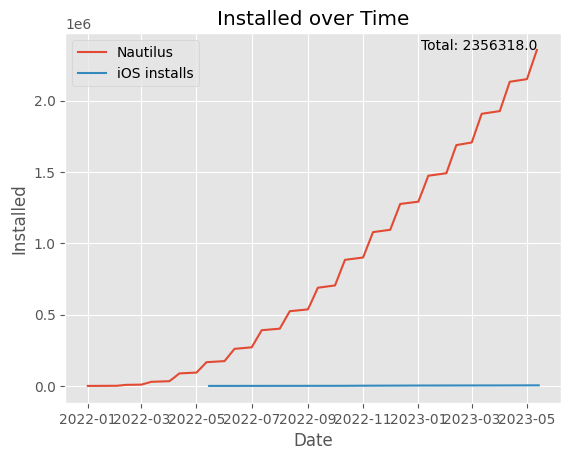

In [24]:
import dateparser
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the ggplot style
plt.style.use('ggplot')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('combined.csv')

# Convert 'Installed' column to numeric
df['Installed'] = df['Installed'].str.replace(',', '').astype(float)

# Initialize an empty list to store the converted dates
converted_dates = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    date_str = row['Date']
    platform = row['Platform']

    if platform == 'Nautilus':
        # Parse the date for Nautilus platform using the format '%m/%d/%Y'
        converted_date = pd.to_datetime(date_str, format='%m/%d/%Y', errors='coerce')
    elif platform == 'Mobile':
        # Parse the date for Mobile platform using the format '%d/%m/%Y'
        converted_date = pd.to_datetime(date_str, format='%d/%m/%Y', errors='coerce')
    else:
        # If platform is neither 'Nautilus' nor 'Mobile', set the converted date as NaT (Not a Time)
        converted_date = pd.NaT

    converted_dates.append(converted_date)

# Add the converted dates to the DataFrame
df['Converted_Date'] = converted_dates

# Filter out rows with invalid dates
df_valid_dates = df.dropna(subset=['Converted_Date'])

# Calculate the cumulative sum for each platform separately
df_valid_dates['Cumulative_Installed'] = df_valid_dates.groupby('Platform')['Installed'].cumsum()

# Group the data by 'Platform'
grouped_data = df_valid_dates.groupby('Platform')

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the cumulative sum for each platform
for platform, data in grouped_data:
    sns.lineplot(data=data, x='Converted_Date', y='Cumulative_Installed', label=platform, ax=ax)

# First, replace the German abbreviations with English full month names
df_ios['Maßeinheit'] = df_ios['Maßeinheit'].replace({
    'Jan.': 'January',
    'Feb.': 'February',
    'März': 'March',
    'Apr.': 'April',
    'Mai': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Aug.': 'August',
    'Sept.': 'September',
    'Okt.': 'October',
    'Nov.': 'November',
    'Dez.': 'December'
}, regex=True)

# Group the new data by 'Maßeinheit' and sum the 'Einheiten'
new_grouped_data = df_ios.groupby('Maßeinheit')['Einheiten'].sum().reset_index()

# Convert 'Maßeinheit' to datetime using dateparser.parse
new_grouped_data['Maßeinheit'] = new_grouped_data['Maßeinheit'].apply(dateparser.parse)

# Sort the data by date
new_grouped_data = new_grouped_data.sort_values(by='Maßeinheit')

# Calculate the cumulative sum for iOS installs
new_grouped_data['Cumulative_Einheiten'] = new_grouped_data['Einheiten'].cumsum()

# Plot the cumulative sum for iOS installs
sns.lineplot(data=new_grouped_data, x='Maßeinheit', y='Cumulative_Einheiten', label="iOS installs", ax=ax)

# Calculate the grand total
total_installs = df_valid_dates['Installed'].sum()

# Add a text annotation on top
# Add a text annotation on top of the chart
ax.text(df_valid_dates['Converted_Date'].max(), df_valid_dates['Cumulative_Installed'].max(), f"Total: {total_installs}", ha='right')

# Set the labels and title for the graph
ax.set_xlabel('Date')
ax.set_ylabel('Installed')
ax.set_title('Installed over Time')

# Show the legend
ax.legend()

# Show the graph
plt.show()
